# Dampe calorimeter regression task

In this project you will be looking at image like data from particle hits in a calorimeter. The goal of the project is to predict the location of the particle in the sky, using the data recorded by the calorimeter.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

data  drive  sample_data  utils.py


In [3]:
from utils import get_input_data
calorimeter_images, calorimeter_data, data_target = get_input_data()

In [4]:
import matplotlib.pyplot as mp
from matplotlib.colors import LogNorm
import numpy as np

In [5]:
n_samples, height, width, channels = calorimeter_images.shape
print(f'There are {n_samples} images, each image is {height} pixels by {width} pixels with {channels} channels.')
print(f'The data is of type {calorimeter_images.dtype}')
print(f'The max data entry is {calorimeter_images.max()} the minimum data entry is {calorimeter_images.min()}.')


There are 141946 images, each image is 14 pixels by 22 pixels with 1 channels.
The data is of type float32
The max data entry is 255.0 the minimum data entry is 0.0.


Lets look at some images from the calorimeter.

In [6]:
print(calorimeter_images.shape)
_calo_images = calorimeter_images.copy()

(141946, 14, 22, 1)


In [7]:
yzview = _calo_images.copy()
yzview[:,1::2,:,:] = 0
print(yzview.shape)

(141946, 14, 22, 1)


In [8]:
xzview = _calo_images.copy()
xzview[:,0::2,:,:] = 0
print(xzview.shape)

(141946, 14, 22, 1)


In [9]:
yzview = np.delete(yzview, range(1, yzview.shape[1], 2), axis=1)
xzview = np.delete(xzview, range(0, xzview.shape[1], 2), axis=1)

In [10]:
print(yzview.shape)
print(xzview.shape)

(141946, 7, 22, 1)
(141946, 7, 22, 1)


In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator

TypeError: ignored

<Figure size 432x288 with 0 Axes>

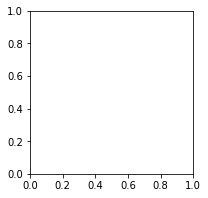

In [12]:
mp.figure()
for i in range(4):
    mp.figure(figsize=(4,3))
    im=mp.imshow(yzview[i], norm=LogNorm())
    ax = mp.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    mp.colorbar(im, cax=cax)
    #mp.colorbar()
    #mp.title('YZ view of BGO')
    #mp.title('XZ view of BGO')
    #mp.xlabel('Bar number')    
    #mp.ylabel('Layer number')
    mp.show()

TypeError: ignored

<Figure size 432x288 with 0 Axes>

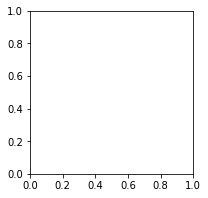

In [13]:
mp.figure()
for i in range(4):
    mp.figure(figsize=(4,3))
    im=mp.imshow(xzview[i], norm=LogNorm())
    ax = mp.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    mp.colorbar(im, cax=cax)
    #mp.colorbar()
    #mp.title('YZ view of BGO')
    #mp.title('XZ view of BGO')
    #mp.xlabel('Bar number')    
    #mp.ylabel('Layer number')
    mp.show()

<Figure size 432x288 with 0 Axes>

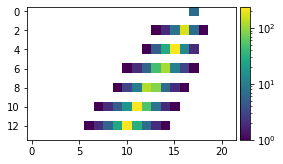

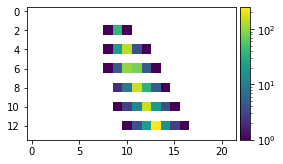

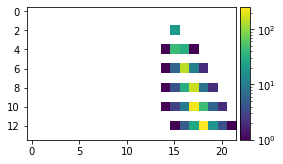

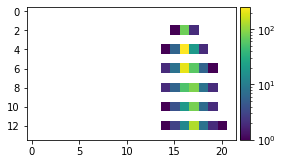

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
mp.figure()
yzview = my2darr.copy()
yzview[:,1::2,:] = 0
#xzview = my2darr
#xzview[:,0::2,:] = 0
for i in range(4):
    mp.figure(figsize=(4,3))
    #im=mp.imshow(my2darr, norm=LogNorm())
    im=mp.imshow(yzview[i], norm=LogNorm())
    #im=mp.imshow(xzview[i])
    ax = mp.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    mp.colorbar(im, cax=cax)
    #mp.colorbar()
    #mp.title('YZ view of BGO')
    #mp.title('XZ view of BGO')
    #mp.xlabel('Bar number')    
    #mp.ylabel('Layer number')
    mp.show()

<Figure size 432x288 with 0 Axes>

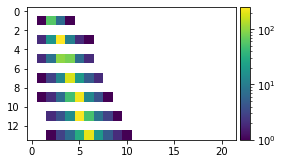

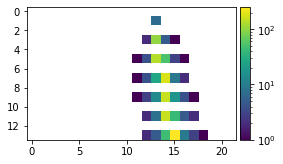

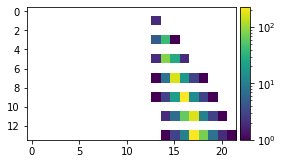

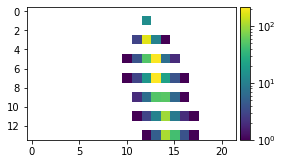

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
mp.figure()
#yzview = my2darr
#yzview[:,1::2,:] = 0
xzview = my2darr.copy()
xzview[:,0::2,:] = 0
for i in range(4):
    mp.figure(figsize=(4,3))
    #im=mp.imshow(my2darr, norm=LogNorm())
    #im=mp.imshow(yzview[i])
    im=mp.imshow(xzview[i], norm=LogNorm())
    ax = mp.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    mp.colorbar(im, cax=cax)
    #mp.colorbar()
    #mp.title('YZ view of BGO')
    #mp.title('XZ view of BGO')
    #mp.xlabel('Bar number')    
    #mp.ylabel('Layer number')
    mp.show()

TypeError: ignored

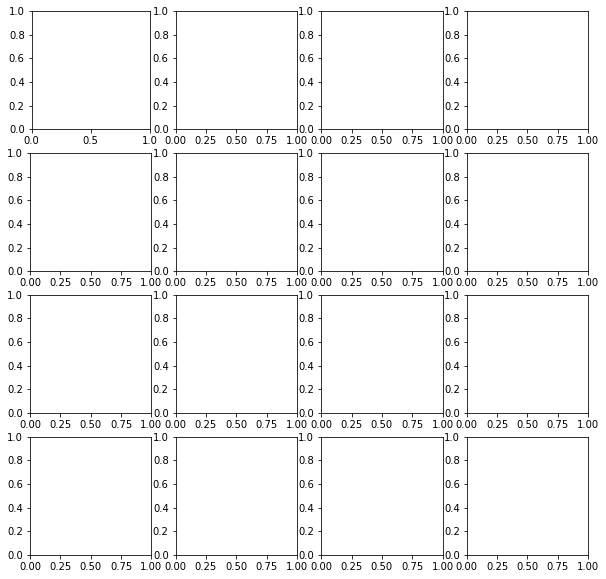

In [14]:
import matplotlib.pyplot as plt
n_c = 4
n_r = 4
fig, ax = plt.subplots(n_c, n_r, figsize=(10, 10))
for i, ax in enumerate(fig.axes):
    # Here we make a copy so we can manipulate the array without changing it in calorimeter_images
    image = calorimeter_images[i].copy()
    # Filling the zero values with NaNs will show us white space where there is zero deposits recorded.
    # Note that if we didn't have the copy there, this would insert NaNs into calorimeter_images.
    image[image == 0] = 'nan'
    ax.imshow(image)
plt.show()

These images show the energy deposits from incoming particles. The next thing we can look at is additional information from the calorimeter. The extra information is given by 
- the total energy measured in the hit (first column), and
- the energy of maximum bar in the calorimeter (second column)

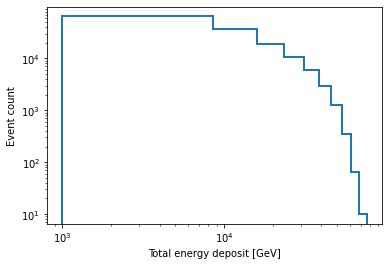

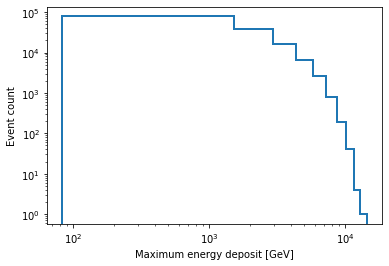

In [15]:
mp.hist(calorimeter_data[:, 0] / 1e3, histtype='step', lw=2)
mp.xscale('log')
mp.yscale('log')
mp.ylabel('Event count')
mp.xlabel('Total energy deposit [GeV]')
mp.show()

mp.hist(calorimeter_data[:, 1] / 1e3, histtype='step', lw=2)
mp.xscale('log')
mp.yscale('log')
mp.ylabel('Event count')
mp.xlabel('Maximum energy deposit [GeV]')
mp.show()

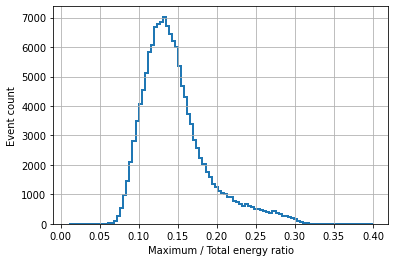

In [16]:
mp.hist(calorimeter_data[:, 1] / calorimeter_data[:, 0], 100,(0.01,0.4), histtype='step', lw=2)
#mp.xscale('log')
#mp.yscale('log')
mp.ylabel('Event count')
mp.xlabel('Maximum / Total energy ratio')
mp.grid()
mp.show()

Using these variables and the image, your goal is to predict the truth x and y coordinates of the incident particle. We can visualise this data in several different ways.

The most straightforward is to look at each example individually. Here we can see that each hit is very different from the others.

In [17]:
data_target

array([[-310.0874  , -261.97125 ,  340.0831  ,  242.79192 ],
       [  18.278515,   43.75296 , -169.0541  , -104.40573 ],
       [ -39.83132 ,   20.43976 ,   26.12911 ,   75.04047 ],
       ...,
       [-324.6862  , -246.73126 ,  174.82977 ,  156.31802 ],
       [ 236.46523 ,  204.2891  ,  -72.50294 ,  -45.80514 ],
       [ -88.14914 ,  -82.94359 ,  358.3128  ,  271.17755 ]],
      dtype=float32)

In [18]:
data_target.max(axis=0)

array([399.96237, 318.69806, 399.99805, 319.43207], dtype=float32)

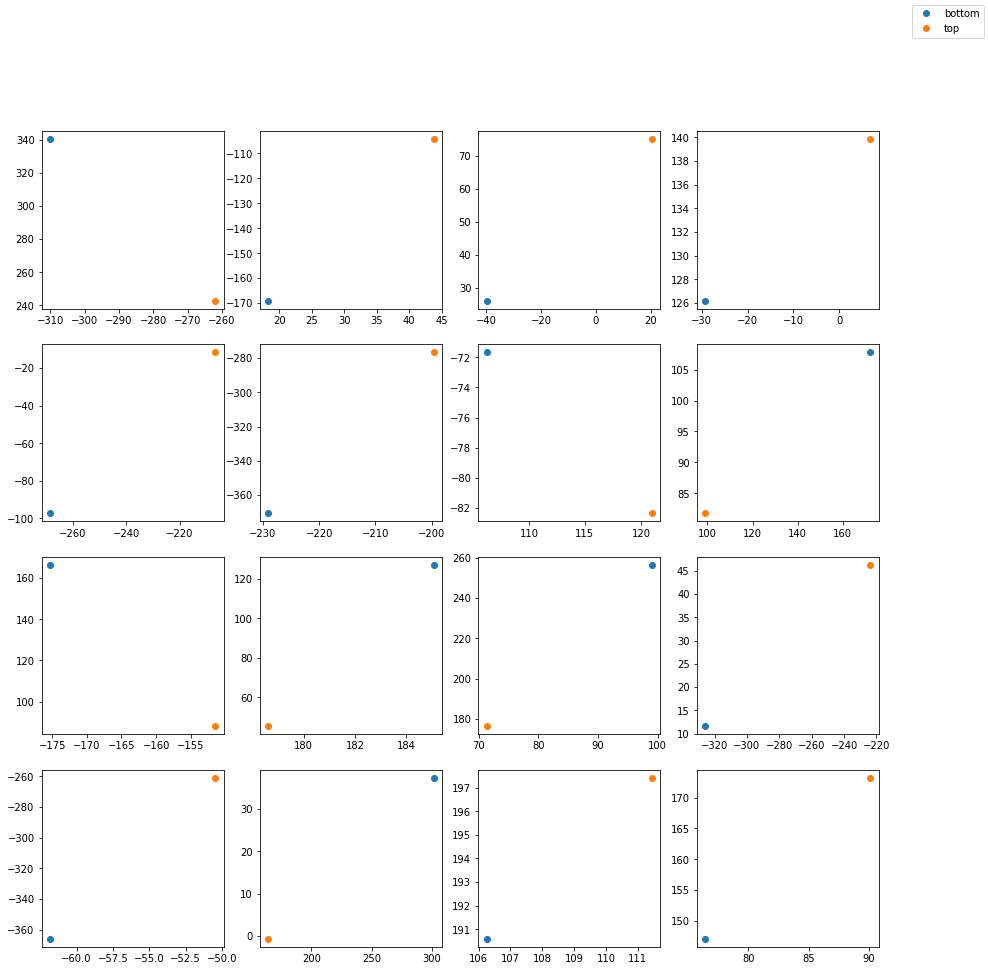

In [19]:
n_c = 4
n_r = 4
fig, axes = plt.subplots(n_c, n_r, figsize=(15, 15))
for i, ax in enumerate(fig.axes):
    x_bot, x_top, y_bot, y_top = data_target[i]
    ax.plot(x_bot, y_bot, 'o', label='bottom')
    ax.plot(x_top, y_top, 'o', label='top')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

It's also important to look at the distributions over each of these features individually.

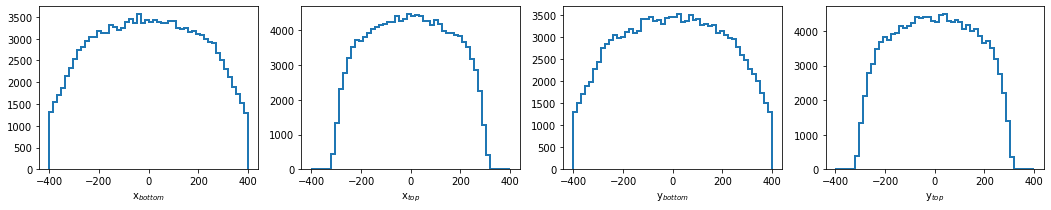

In [20]:
n_c = 1
n_r = 4
fig, axes = mp.subplots(n_c, n_r, figsize=(18, 3))
names = ['x$_{bottom}$', 'x$_{top}$', 'y$_{bottom}$', 'y$_{top}$']
for i, ax in enumerate(fig.axes):
    ax.hist(data_target[:, i], 50, (-400,400), histtype='step', lw=2)
    ax.set_xlabel(names[i])
mp.show()

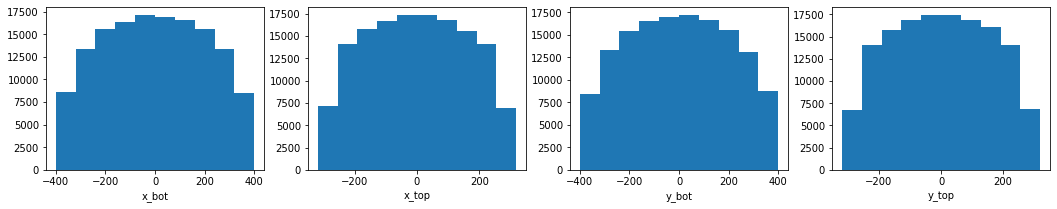

In [21]:
n_c = 1
n_r = 4
fig, axes = plt.subplots(n_c, n_r, figsize=(18, 3))
names = ['x_bot', 'x_top', 'y_bot', 'y_top']
for i, ax in enumerate(fig.axes):
    ax.hist(data_target[:, i])
    ax.set_xlabel(names[i])
plt.show()

We can also look at how the data is distributed as a whole, to see if there are any regions that are left out.

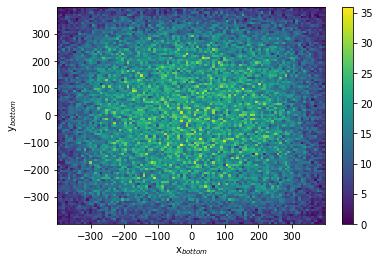

In [22]:
plt.hist2d(data_target[:, 0], data_target[:, 2], bins=100)
plt.xlabel('x$_{bottom}$')
plt.ylabel('y$_{bottom}$')
plt.colorbar()
plt.show()

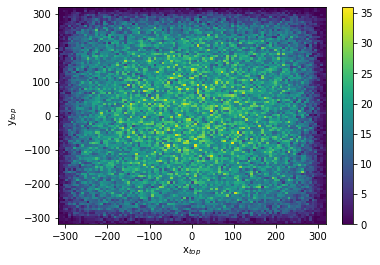

In [23]:
plt.hist2d(data_target[:, 1], data_target[:, 3], bins=100)
plt.xlabel('x$_{top}$')
plt.ylabel('y$_{top}$')
plt.colorbar()
plt.show()

The target distribution is quite tricky to visualise, and you should try to come up with your own ways of visualising it. How are the angles between hits distributed? How are the magnitudes of the vectors distributed? Will there be problems with predicting these values? Will any of these distributions lead to biases? 

These are the kinds of questions you might want to address.

In [24]:
import tensorflow as tf
from tensorflow.keras.losses import mse,mae,huber,logcosh
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

In [25]:
#ins = Input(shape=(14,22,1))
ins1 = Input(shape=(7,22,1))
ins2 = Input(shape=(7,22,1))
#aug = Input(shape=(2))
merged = Concatenate(axis=1)([ins1, ins2])
h1 = Conv2D(filters=120,
            kernel_size=(4,4),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(merged)#(ins)
h2 = Conv2D(filters=60,
            kernel_size=(4,4),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(h1)
h3 = Conv2D(filters=30,
            kernel_size=(4,4),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(h2)
h4 = GlobalAveragePooling2D()(h3)
#augment = Concatenate(axis=1)([h4, aug])
h5 = Dense(units=4,activation='relu')(h4)#(augment)#(h4)
outs = Dense(units=4,activation='linear')(h4)
model = Model(inputs=[ins1, ins2],outputs=outs)
#model = Model(inputs=[ins1, ins2, aug],outputs=outs)

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 22, 1)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 22, 1)]   0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 14, 22, 1)    0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 11, 19, 120)  2040        ['concatenate[0][0]']        

In [27]:
data_split_1 = 0.6
data_split_2 = 0.2

n_data = calorimeter_images.shape[0]
n_train = int(data_split_1 * n_data)
n_valid = n_train + int(data_split_2 * n_data)

training_data = [yzview[:n_train], xzview[:n_train]]#, calorimeter_data[:n_train]]
validation_data = [yzview[n_train:n_valid], xzview[n_train:n_valid]]#, calorimeter_data[n_train:n_valid]]
training_labels = data_target[:n_train]
validation_labels = data_target[n_train:n_valid]

In [30]:
print(n_data)
print(n_train)
print(n_valid)

141946
85167
113556


In [39]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#model.compile(optimizer, loss='mse')#, metrics=['mse', 'mae', 'logcosh'])
model.compile(optimizer, loss='mse', metrics=['accuracy'])
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
history = model.fit(training_data, 
                    training_labels, 
                    epochs=150, verbose=True, 
                    callbacks=[callback_es],
                    #batch_size=9463,
                    batch_size=1000,
                    validation_data=(validation_data, validation_labels))

Epoch 1/150
86/86 [==============================] - 6s 64ms/step - loss: 3034.7717 - accuracy: 0.8353 - val_loss: 1584.2759 - val_accuracy: 0.8970
Epoch 2/150
86/86 [==============================] - 5s 61ms/step - loss: 1510.0205 - accuracy: 0.9016 - val_loss: 1544.4647 - val_accuracy: 0.9051
Epoch 3/150
86/86 [==============================] - 5s 62ms/step - loss: 1484.4674 - accuracy: 0.9045 - val_loss: 1528.3616 - val_accuracy: 0.9065
Epoch 4/150
86/86 [==============================] - 5s 62ms/step - loss: 1472.8612 - accuracy: 0.9050 - val_loss: 1520.4705 - val_accuracy: 0.9053
Epoch 5/150
86/86 [==============================] - 5s 63ms/step - loss: 1462.7563 - accuracy: 0.9050 - val_loss: 1565.2889 - val_accuracy: 0.9047
Epoch 6/150
86/86 [==============================] - 5s 63ms/step - loss: 1466.8242 - accuracy: 0.9046 - val_loss: 1488.3848 - val_accuracy: 0.9076
Epoch 7/150
86/86 [==============================] - 5s 63ms/step - loss: 1464.8191 - accuracy: 0.9046 - val_los

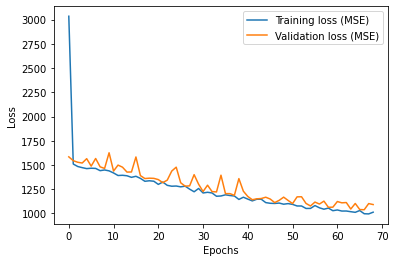

In [40]:
plot_losses(history)

In [37]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#model.compile(optimizer, loss='mse')#, metrics=['mse', 'mae', 'logcosh'])
model.compile(optimizer, loss='mse', metrics=['accuracy'])
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
history = model.fit(training_data, 
                    training_labels, 
                    epochs=50, verbose=True, 
                    callbacks=[callback_es],
                    #batch_size=9463,
                    batch_size=1000,
                    validation_data=(validation_data, validation_labels))

Epoch 1/50
86/86 [==============================] - 6s 66ms/step - loss: 5734.3159 - accuracy: 0.8416 - val_loss: 3157.3809 - val_accuracy: 0.8747
Epoch 2/50
86/86 [==============================] - 5s 62ms/step - loss: 3028.7039 - accuracy: 0.8749 - val_loss: 3041.5088 - val_accuracy: 0.8775
Epoch 3/50
86/86 [==============================] - 5s 62ms/step - loss: 2925.1045 - accuracy: 0.8770 - val_loss: 2919.3921 - val_accuracy: 0.8796
Epoch 4/50
86/86 [==============================] - 5s 62ms/step - loss: 2842.2805 - accuracy: 0.8773 - val_loss: 2836.6277 - val_accuracy: 0.8805
Epoch 5/50
86/86 [==============================] - 5s 62ms/step - loss: 2757.0083 - accuracy: 0.8788 - val_loss: 2846.6475 - val_accuracy: 0.8736
Epoch 6/50
86/86 [==============================] - 5s 63ms/step - loss: 2670.9106 - accuracy: 0.8802 - val_loss: 2657.5952 - val_accuracy: 0.8841
Epoch 7/50
86/86 [==============================] - 5s 63ms/step - loss: 2620.6914 - accuracy: 0.8792 - val_loss: 2704

In [74]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#model.compile(optimizer, loss='mse')#, metrics=['mse', 'mae', 'logcosh'])
model.compile(optimizer, loss='mse', metrics=['accuracy'])
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=50)
history = model.fit(training_data, 
                    training_labels, 
                    epochs=200, verbose=True, 
                    callbacks=[callback_es],
                    #batch_size=9463,
                    batch_size=800,
                    validation_data=(validation_data, validation_labels))

Epoch 1/200
142/142 [==============================] - 8s 50ms/step - loss: 3233.9026 - accuracy: 0.7588 - val_loss: 2024.4025 - val_accuracy: 0.7738
Epoch 2/200
142/142 [==============================] - 7s 49ms/step - loss: 1989.8506 - accuracy: 0.7764 - val_loss: 1995.8651 - val_accuracy: 0.7729
Epoch 3/200
142/142 [==============================] - 7s 51ms/step - loss: 1963.6422 - accuracy: 0.7755 - val_loss: 1965.7354 - val_accuracy: 0.7731
Epoch 4/200
142/142 [==============================] - 7s 52ms/step - loss: 1941.6423 - accuracy: 0.7754 - val_loss: 1947.2903 - val_accuracy: 0.7747
Epoch 5/200
142/142 [==============================] - 7s 52ms/step - loss: 1933.8278 - accuracy: 0.7749 - val_loss: 1934.0298 - val_accuracy: 0.7736
Epoch 6/200
142/142 [==============================] - 7s 52ms/step - loss: 1926.2047 - accuracy: 0.7753 - val_loss: 1924.4169 - val_accuracy: 0.7749
Epoch 7/200
142/142 [==============================] - 8s 57ms/step - loss: 1905.9718 - accuracy: 0.

In [ ]:
train_acc = model.evaluate(training_data, training_labels, verbose=0)
valid_acc = model.evaluate(validation_data, validation_labels, verbose=0)

In [ ]:
print(train_acc, valid_acc)

[5999.1259765625, 0.6962291598320007] [5936.82177734375, 0.6984043121337891]


In [31]:
def plot_losses(history):
    mp.plot(history.history['loss'], label='Training loss (MSE)')
    mp.plot(history.history['val_loss'], label='Validation loss (MSE)')
    #plt.plot(history.history['mae'], label='mean_absolute_error')
    #plt.plot(history.history['mape'], label='mean_absolute_percentage_error')
    #plt.plot(history.history['logcosh'], label='logcosh')
    mp.xlabel('Epochs')
    mp.ylabel('Loss')
    #mp.ylim(100,5e11)
    mp.legend()
    mp.show()

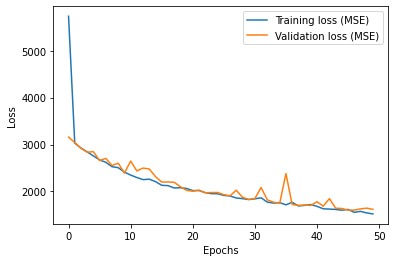

In [38]:
plot_losses(history)

```
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#model.compile(optimizer, loss='mse')#, metrics=['mse', 'mae', 'logcosh'])
model.compile(optimizer, loss='mse', metrics=['accuracy'])
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
history = model.fit(training_data, 
                    training_labels, 
                    epochs=50, verbose=True, 
                    callbacks=[callback_es],
                    #batch_size=9463,
                    batch_size=1000,
                    validation_data=(validation_data, validation_labels))
```



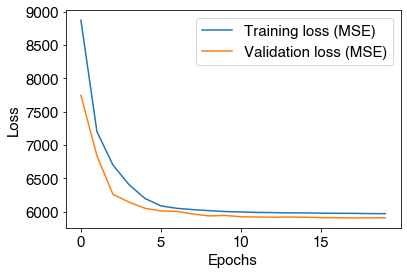

In [ ]:
plot_losses(history)

In [41]:
predictions = model.predict(validation_data)
print(predictions)
predictions.shape

[[-292.7824   -251.8142   -229.89412  -147.84428 ]
 [-329.42548  -237.80727    29.13526   -23.721054]
 [-329.52478  -250.05128    77.8481      9.797513]
 ...
 [ 387.9046    235.7075   -230.3703   -202.68054 ]
 [ 129.43355   141.7711   -162.01358   -92.8894  ]
 [-201.31177   -87.427505 -171.49815   -89.61332 ]]


(28389, 4)

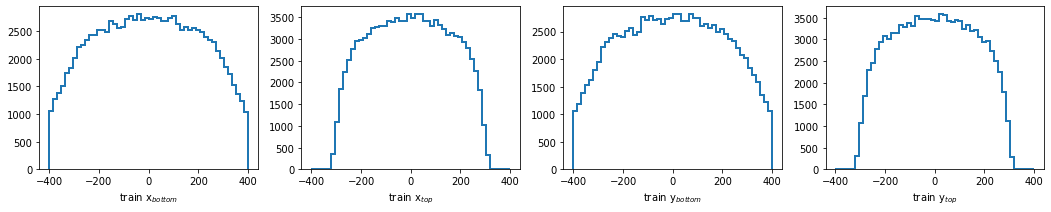

In [61]:
n_c = 1
n_r = 4
fig, axes = mp.subplots(n_c, n_r, figsize=(18, 3))
names = ['train x$_{bottom}$', 'train x$_{top}$', 'train y$_{bottom}$', 'train y$_{top}$']
for i, ax in enumerate(fig.axes):
    ax.hist(training_labels[:, i], 50, (-400,400), histtype='step', lw=2)
    ax.set_xlabel(names[i])
mp.show()

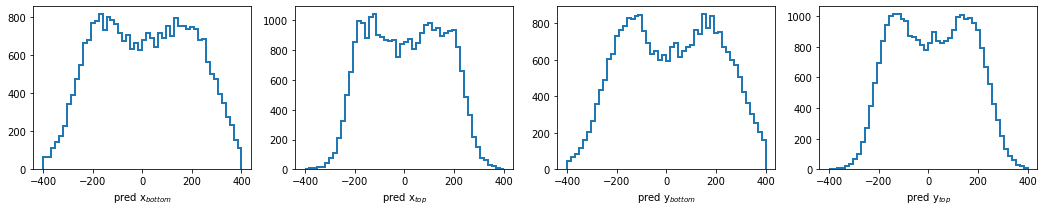

In [34]:
n_c = 1
n_r = 4
fig, axes = mp.subplots(n_c, n_r, figsize=(18, 3))
names = ['pred x$_{bottom}$', 'pred x$_{top}$', 'pred y$_{bottom}$', 'pred y$_{top}$']
for i, ax in enumerate(fig.axes):
    ax.hist(predictions[:, i], 50, (-400,400), histtype='step', lw=2)
    ax.set_xlabel(names[i])
mp.show()

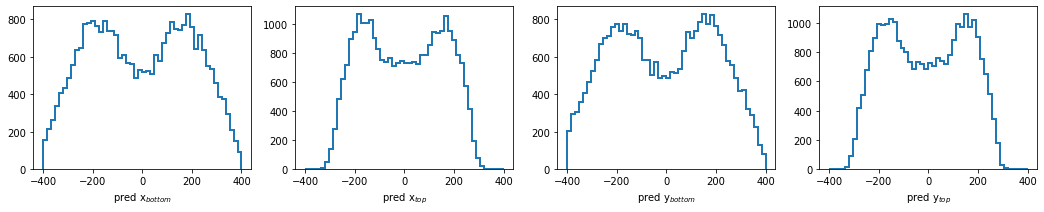

In [42]:
n_c = 1
n_r = 4
fig, axes = mp.subplots(n_c, n_r, figsize=(18, 3))
names = ['pred x$_{bottom}$', 'pred x$_{top}$', 'pred y$_{bottom}$', 'pred y$_{top}$']
for i, ax in enumerate(fig.axes):
    ax.hist(predictions[:, i], 50, (-400,400), histtype='step', lw=2)
    ax.set_xlabel(names[i])
mp.show()

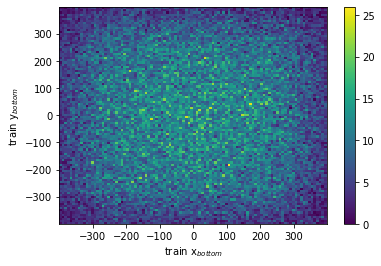

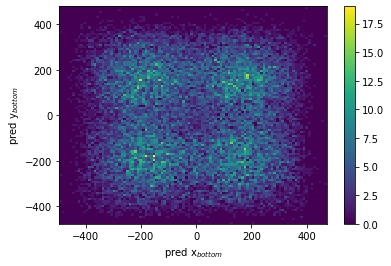

In [43]:
mp.hist2d(training_labels[:, 0], training_labels[:, 2], bins=100)
mp.xlabel('train x$_{bottom}$')
mp.ylabel('train y$_{bottom}$')
mp.colorbar()
mp.show()

mp.hist2d(predictions[:, 0], predictions[:, 2], bins=100)
mp.xlabel('pred x$_{bottom}$')
mp.ylabel('pred y$_{bottom}$')
mp.colorbar()
mp.show()

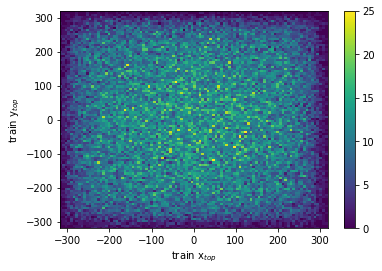

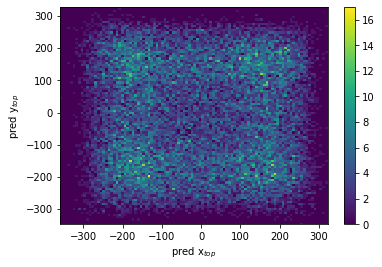

In [44]:
mp.hist2d(training_labels[:, 1], training_labels[:, 3], bins=100)
mp.xlabel('train x$_{top}$')
mp.ylabel('train y$_{top}$')
mp.colorbar()
mp.show()

mp.hist2d(predictions[:, 1], predictions[:, 3], bins=100)
mp.xlabel('pred x$_{top}$')
mp.ylabel('pred y$_{top}$')
mp.colorbar()
mp.show()

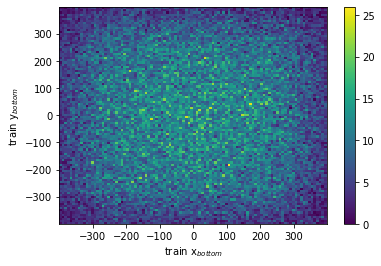

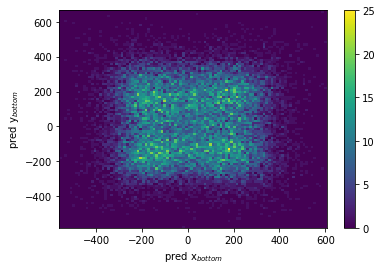

In [35]:
mp.hist2d(training_labels[:, 0], training_labels[:, 2], bins=100)
mp.xlabel('train x$_{bottom}$')
mp.ylabel('train y$_{bottom}$')
mp.colorbar()
mp.show()

mp.hist2d(predictions[:, 0], predictions[:, 2], bins=100)
mp.xlabel('pred x$_{bottom}$')
mp.ylabel('pred y$_{bottom}$')
mp.colorbar()
mp.show()

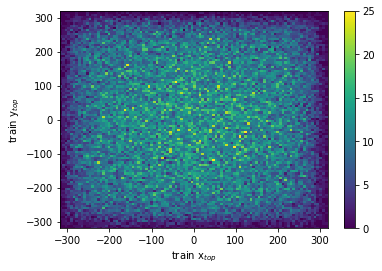

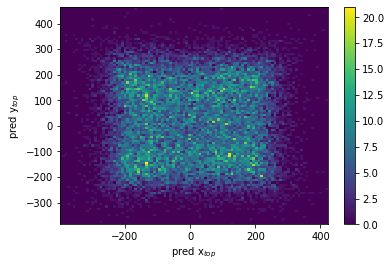

In [36]:
mp.hist2d(training_labels[:, 1], training_labels[:, 3], bins=100)
mp.xlabel('train x$_{top}$')
mp.ylabel('train y$_{top}$')
mp.colorbar()
mp.show()

mp.hist2d(predictions[:, 1], predictions[:, 3], bins=100)
mp.xlabel('pred x$_{top}$')
mp.ylabel('pred y$_{top}$')
mp.colorbar()
mp.show()

In [45]:
#ins = Input(shape=(14,22,1))
ins1 = Input(shape=(7,22,1))
ins2 = Input(shape=(7,22,1))
#aug = Input(shape=(2))
merged = Concatenate(axis=1)([ins1, ins2])
h1 = Conv2D(filters=120,
            kernel_size=(3,3),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(merged)#(ins)
h2 = Conv2D(filters=60,
            kernel_size=(3,3),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(h1)
h3 = Conv2D(filters=30,
            kernel_size=(3,3),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(h2)
h4 = GlobalAveragePooling2D()(h3)
#augment = Concatenate(axis=1)([h4, aug])
h5 = Dense(units=4,activation='relu')(h4)#(augment)#(h4)
outs = Dense(units=4,activation='linear')(h4)
model = Model(inputs=[ins1, ins2],outputs=outs)
#model = Model(inputs=[ins1, ins2, aug],outputs=outs)

In [46]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 7, 22, 1)]   0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 7, 22, 1)]   0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 14, 22, 1)    0           ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 12, 20, 120)  1200        ['concatenate_1[0][0]']    

In [48]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#model.compile(optimizer, loss='mse')#, metrics=['mse', 'mae', 'logcosh'])
model.compile(optimizer, loss='mse', metrics=['accuracy'])
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
history = model.fit(training_data, 
                    training_labels, 
                    epochs=50, verbose=True, 
                    callbacks=[callback_es],
                    #batch_size=9463,
                    batch_size=1000,
                    validation_data=(validation_data, validation_labels))

Epoch 1/50
86/86 [==============================] - 4s 40ms/step - loss: 8208.9678 - accuracy: 0.7351 - val_loss: 7338.4453 - val_accuracy: 0.7532
Epoch 2/50
86/86 [==============================] - 3s 39ms/step - loss: 7039.3765 - accuracy: 0.7586 - val_loss: 6912.2764 - val_accuracy: 0.7655
Epoch 3/50
86/86 [==============================] - 4s 42ms/step - loss: 6607.8154 - accuracy: 0.7708 - val_loss: 6500.2930 - val_accuracy: 0.7764
Epoch 4/50
86/86 [==============================] - 3s 39ms/step - loss: 6231.6011 - accuracy: 0.7840 - val_loss: 6268.6060 - val_accuracy: 0.7886
Epoch 5/50
86/86 [==============================] - 4s 42ms/step - loss: 5908.4795 - accuracy: 0.7943 - val_loss: 6102.2642 - val_accuracy: 0.8034
Epoch 6/50
86/86 [==============================] - 3s 39ms/step - loss: 5674.8438 - accuracy: 0.8034 - val_loss: 5657.8877 - val_accuracy: 0.8108
Epoch 7/50
86/86 [==============================] - 4s 42ms/step - loss: 5417.7637 - accuracy: 0.8122 - val_loss: 5315

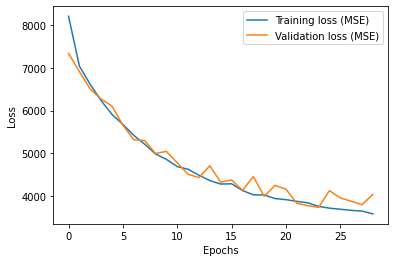

In [49]:
plot_losses(history)

In [50]:
#ins = Input(shape=(14,22,1))
ins1 = Input(shape=(7,22,1))
ins2 = Input(shape=(7,22,1))
aug = Input(shape=(2))
merged = Concatenate(axis=1)([ins1, ins2])
h1 = Conv2D(filters=120,
            kernel_size=(3,3),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(merged)#(ins)
h2 = Conv2D(filters=60,
            kernel_size=(3,3),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(h1)
h3 = Conv2D(filters=30,
            kernel_size=(3,3),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(h2)
h4 = GlobalAveragePooling2D()(h3)
augment = Concatenate(axis=1)([h4, aug])
h5 = Dense(units=4,activation='relu')(augment)#(h4)
outs = Dense(units=4,activation='linear')(h5)
#model = Model(inputs=[ins1, ins2],outputs=outs)
model = Model(inputs=[ins1, ins2, aug],outputs=outs)

In [51]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 7, 22, 1)]   0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 7, 22, 1)]   0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 14, 22, 1)    0           ['input_5[0][0]',                
                                                                  'input_6[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 12, 20, 120)  1200        ['concatenate_2[0][0]']    

In [53]:
data_split_1 = 0.6
data_split_2 = 0.2

n_data = calorimeter_images.shape[0]
n_train = int(data_split_1 * n_data)
n_valid = n_train + int(data_split_2 * n_data)

training_data = [yzview[:n_train], xzview[:n_train], calorimeter_data[:n_train]]
validation_data = [yzview[n_train:n_valid], xzview[n_train:n_valid], calorimeter_data[n_train:n_valid]]
training_labels = data_target[:n_train]
validation_labels = data_target[n_train:n_valid]

In [54]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#model.compile(optimizer, loss='mse')#, metrics=['mse', 'mae', 'logcosh'])
model.compile(optimizer, loss='mse', metrics=['accuracy'])
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
history = model.fit(training_data, 
                    training_labels, 
                    epochs=10, verbose=True, 
                    callbacks=[callback_es],
                    #batch_size=9463,
                    batch_size=1000,
                    validation_data=(validation_data, validation_labels))

Epoch 1/10
86/86 [==============================] - 4s 41ms/step - loss: 3196411707392.0000 - accuracy: 0.2455 - val_loss: 1074002722816.0000 - val_accuracy: 0.1630
Epoch 2/10
86/86 [==============================] - 4s 44ms/step - loss: 585977692160.0000 - accuracy: 0.1620 - val_loss: 243786956800.0000 - val_accuracy: 0.1631
Epoch 3/10
86/86 [==============================] - 3s 38ms/step - loss: 112962109440.0000 - accuracy: 0.1708 - val_loss: 42691129344.0000 - val_accuracy: 0.1668
Epoch 4/10
86/86 [==============================] - 3s 38ms/step - loss: 23173021696.0000 - accuracy: 0.1682 - val_loss: 12408051712.0000 - val_accuracy: 0.1649
Epoch 5/10
86/86 [==============================] - 3s 38ms/step - loss: 8028585472.0000 - accuracy: 0.1660 - val_loss: 5535136768.0000 - val_accuracy: 0.1631
Epoch 6/10
86/86 [==============================] - 4s 42ms/step - loss: 4109859328.0000 - accuracy: 0.1651 - val_loss: 3168225536.0000 - val_accuracy: 0.1616
Epoch 7/10
86/86 [=============

In [55]:
predictions = model.predict(validation_data)
print(predictions)
predictions.shape

[[-0.03285053 -0.0572377   0.15524988  0.17785582]
 [-0.03285053 -0.0572377   0.15524988  0.17785582]
 [-0.03285053 -0.0572377   0.15524988  0.17785582]
 ...
 [-0.03285053 -0.0572377   0.15524988  0.17785582]
 [-0.03285053 -0.0572377   0.15524988  0.17785582]
 [-0.03285053 -0.0572377   0.15524988  0.17785582]]


(28389, 4)

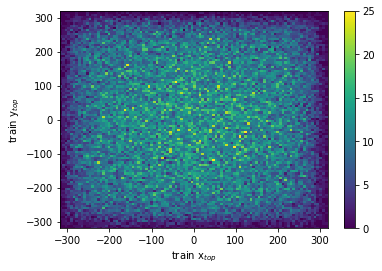

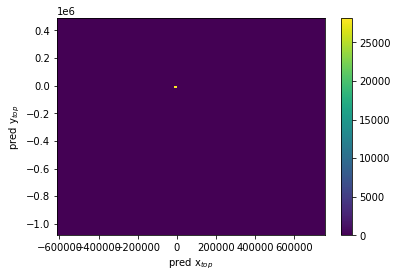

In [56]:
mp.hist2d(training_labels[:, 1], training_labels[:, 3], bins=100)
mp.xlabel('train x$_{top}$')
mp.ylabel('train y$_{top}$')
mp.colorbar()
mp.show()

mp.hist2d(predictions[:, 1], predictions[:, 3], bins=100)
mp.xlabel('pred x$_{top}$')
mp.ylabel('pred y$_{top}$')
mp.colorbar()
mp.show()

In [58]:
#ins = Input(shape=(14,22,1))
ins1 = Input(shape=(7,22,1))
ins2 = Input(shape=(7,22,1))
#aug = Input(shape=(2))
merged = Concatenate(axis=1)([ins1, ins2])
h1 = Conv2D(filters=120,
            kernel_size=(4,4),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(merged)#(ins)
h2 = Conv2D(filters=60,
            kernel_size=(4,4),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(h1)
h3 = Conv2D(filters=30,
            kernel_size=(4,4),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(h2)
h4 = GlobalAveragePooling2D()(h3)
#augment = Concatenate(axis=1)([h4, aug])
h5 = Dense(units=4,activation='relu')(h4)#(augment)#(h4)
outs = Dense(units=4,activation='linear')(h4)
model = Model(inputs=[ins1, ins2],outputs=outs)
#model = Model(inputs=[ins1, ins2, aug],outputs=outs)

In [59]:
data_split_1 = 0.6
data_split_2 = 0.2

n_data = calorimeter_images.shape[0]
n_train = int(data_split_1 * n_data)
n_valid = n_train + int(data_split_2 * n_data)

training_data = [yzview[:n_train], xzview[:n_train]]#, calorimeter_data[:n_train]]
validation_data = [yzview[n_train:n_valid], xzview[n_train:n_valid]]#, calorimeter_data[n_train:n_valid]]
training_labels = data_target[:n_train]
validation_labels = data_target[n_train:n_valid]

In [60]:
test_data = [yzview[n_valid:], xzview[n_valid:]]#, calorimeter_data[n_train:n_valid]]
test_labels = data_target[:n_train]

In [65]:
print(len(training_data[0]),len(training_data[1]))
print(len(validation_data[0]),len(validation_data[1]))
print(len(test_data[0]),len(test_data[1]))

85167 85167
28389 28389
28390 28390


In [72]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer, loss='mse', metrics=['mse', 'mae', 'logcosh'])
#model.compile(optimizer, loss='mse', metrics=['accuracy'])
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
history = model.fit(training_data, 
                    training_labels, 
                    epochs=50, verbose=True, 
                    callbacks=[callback_es],
                    #batch_size=9463,
                    batch_size=1000,
                    validation_data=(validation_data, validation_labels))

Epoch 1/50
86/86 [==============================] - 6s 65ms/step - loss: 5045.7837 - mse: 5045.7837 - mae: 49.4456 - logcosh: 48.7588 - val_loss: 2319.8474 - val_mse: 2319.8474 - val_mae: 35.5601 - val_logcosh: 34.8750
Epoch 2/50
86/86 [==============================] - 5s 63ms/step - loss: 2220.5405 - mse: 2220.5405 - mae: 34.9505 - logcosh: 34.2657 - val_loss: 2239.6001 - val_mse: 2239.6001 - val_mae: 35.0167 - val_logcosh: 34.3317
Epoch 3/50
86/86 [==============================] - 5s 63ms/step - loss: 2174.9792 - mse: 2174.9792 - mae: 34.6545 - logcosh: 33.9698 - val_loss: 2195.2065 - val_mse: 2195.2065 - val_mae: 34.7232 - val_logcosh: 34.0383
Epoch 4/50
86/86 [==============================] - 5s 64ms/step - loss: 2151.6960 - mse: 2151.6960 - mae: 34.5431 - logcosh: 33.8582 - val_loss: 2166.6604 - val_mse: 2166.6604 - val_mae: 34.6527 - val_logcosh: 33.9679
Epoch 5/50
86/86 [==============================] - 5s 64ms/step - loss: 2128.4302 - mse: 2128.4302 - mae: 34.3598 - logcosh

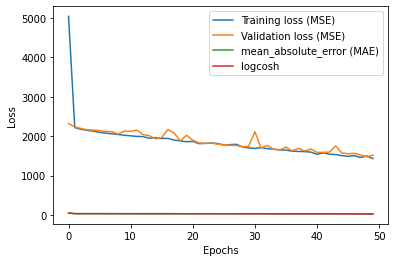

In [77]:
plot_losses(history)

In [78]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#model.compile(optimizer, loss='mse', metrics=['mse', 'mae', 'logcosh'])
model.compile(optimizer, loss='mse', metrics=['accuracy'])
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
history = model.fit(training_data, 
                    training_labels, 
                    epochs=100, verbose=True, 
                    callbacks=[callback_es],
                    #batch_size=9463,
                    batch_size=800,
                    validation_data=(validation_data, validation_labels))

Epoch 1/100
107/107 [==============================] - 7s 52ms/step - loss: 3117.9590 - accuracy: 0.8547 - val_loss: 1494.6775 - val_accuracy: 0.9036
Epoch 2/100
107/107 [==============================] - 5s 48ms/step - loss: 1424.3776 - accuracy: 0.9063 - val_loss: 1461.1226 - val_accuracy: 0.9069
Epoch 3/100
107/107 [==============================] - 5s 49ms/step - loss: 1402.8077 - accuracy: 0.9079 - val_loss: 1436.9484 - val_accuracy: 0.9080
Epoch 4/100
107/107 [==============================] - 5s 49ms/step - loss: 1388.5192 - accuracy: 0.9081 - val_loss: 1421.8029 - val_accuracy: 0.9079
Epoch 5/100
107/107 [==============================] - 5s 49ms/step - loss: 1383.8202 - accuracy: 0.9064 - val_loss: 1417.5359 - val_accuracy: 0.9052
Epoch 6/100
107/107 [==============================] - 5s 49ms/step - loss: 1373.7263 - accuracy: 0.9071 - val_loss: 1423.3579 - val_accuracy: 0.9021
Epoch 7/100
107/107 [==============================] - 5s 49ms/step - loss: 1359.8425 - accuracy: 0.

In [76]:
def plot_losses(history):
    mp.plot(history.history['loss'], label='Training loss (MSE)')
    mp.plot(history.history['val_loss'], label='Validation loss (MSE)')
    plt.plot(history.history['mae'], label='mean_absolute_error (MAE)')
    #plt.plot(history.history['mape'], label='mean_absolute_percentage_error')
    plt.plot(history.history['logcosh'], label='logcosh')
    mp.xlabel('Epochs')
    mp.ylabel('Loss')
    #mp.ylim(1000,3000)
    mp.legend()
    mp.show()

In [81]:
predictions = model.predict(validation_data)
print(predictions)
predictions.shape

[[-292.65482  -252.82153  -235.44926  -146.95496 ]
 [-342.68277  -248.5708     20.385658  -19.237246]
 [-287.97693  -218.30641    62.480896   -1.958238]
 ...
 [ 398.6249    247.17323  -230.15288  -197.56569 ]
 [ 152.36288   158.59528  -138.6556    -69.36603 ]
 [-198.51103   -95.98561  -176.73744   -91.651215]]


(28389, 4)

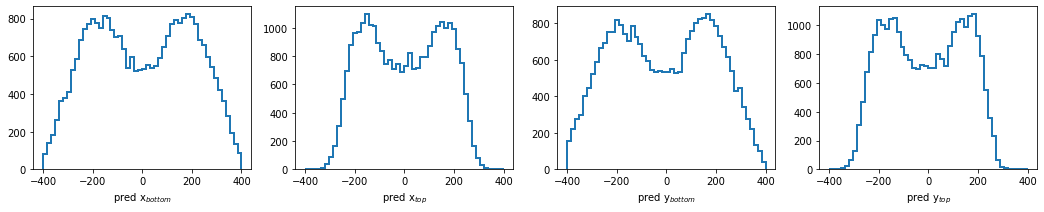

In [82]:
n_c = 1
n_r = 4
fig, axes = mp.subplots(n_c, n_r, figsize=(18, 3))
names = ['pred x$_{bottom}$', 'pred x$_{top}$', 'pred y$_{bottom}$', 'pred y$_{top}$']
for i, ax in enumerate(fig.axes):
    ax.hist(predictions[:, i], 50, (-400,400), histtype='step', lw=2)
    ax.set_xlabel(names[i])
mp.show()

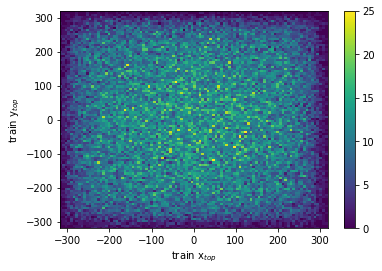

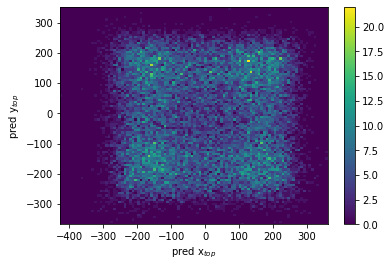

In [83]:
mp.hist2d(training_labels[:, 1], training_labels[:, 3], bins=100)
mp.xlabel('train x$_{top}$')
mp.ylabel('train y$_{top}$')
mp.colorbar()
mp.show()

mp.hist2d(predictions[:, 1], predictions[:, 3], bins=100)
mp.xlabel('pred x$_{top}$')
mp.ylabel('pred y$_{top}$')
mp.colorbar()
mp.show()

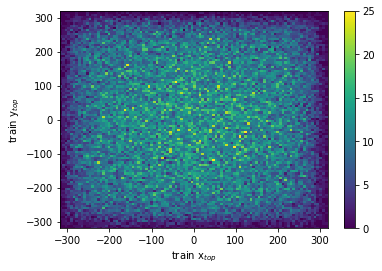

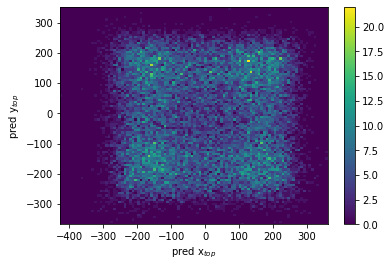

In [84]:
mp.hist2d(training_labels[:, 1], training_labels[:, 3], bins=100)
mp.xlabel('train x$_{top}$')
mp.ylabel('train y$_{top}$')
mp.colorbar()
mp.show()

mp.hist2d(predictions[:, 1], predictions[:, 3], bins=100)
mp.xlabel('pred x$_{top}$')
mp.ylabel('pred y$_{top}$')
mp.colorbar()
mp.show()

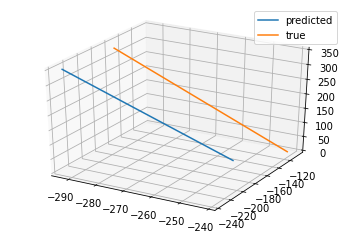

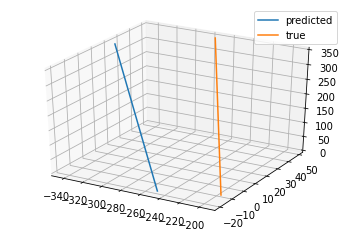

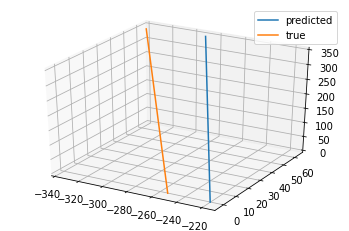

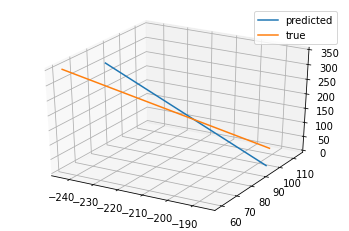

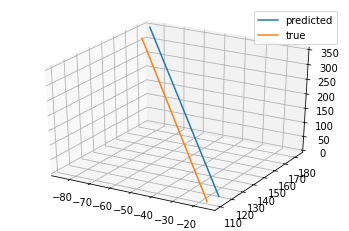

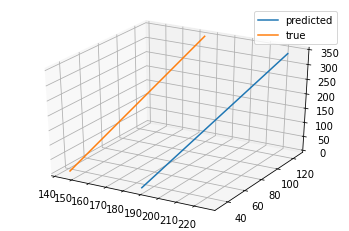

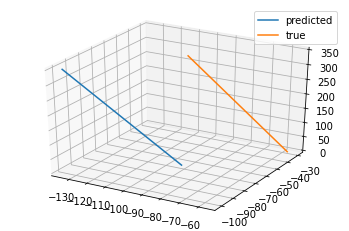

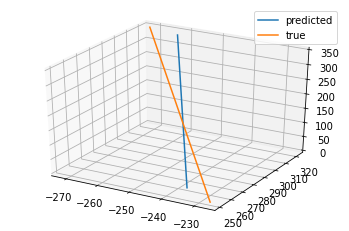

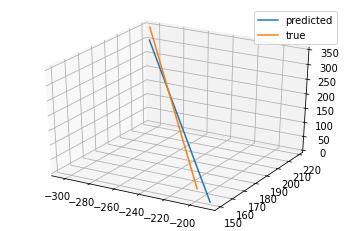

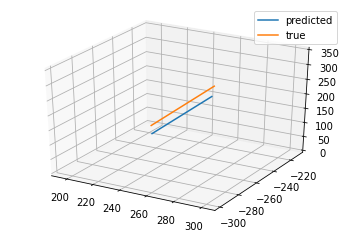

In [95]:
for i in range(10):
  fig = mp.figure()
  ax = mp.axes(projection='3d')
  x_pred = np.zeros(2)
  y_pred = np.zeros(2)
  y_true = np.zeros(2)
  y_true = np.zeros(2)
  # defining coordinates for the 2 points.
  x_pred = np.array([predictions[i,1], predictions[i,0]])
  y_pred = np.array([predictions[i,3], predictions[i,2]])
  x_true = np.array([data_target[i+n_train,1], data_target[i+n_train,0]])
  y_true = np.array([data_target[i+n_train,3], data_target[i+n_train,2]])
  z = np.array([0, 350])
  # plotting
  ax.plot3D(x_pred, y_pred, z, label='predicted')
  ax.plot3D(x_true, y_true, z, label='true')
  mp.legend()
  mp.show()